## Support Vector Regression (SVR)

<ul>
<li>Hyperplane:</li>
Hyperplanes are decision boundaries that is used to predict the continuous output. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors. These are used to plot the required line that shows the predicted output of the algorithm.
<li>Kernel:</li>
A kernel is a set of mathematical functions that takes data as input and transform it into the required form. These are generally used for finding a hyperplane in the higher dimensional space.
<li>Boundary Lines:</li>
These are the two lines that are drawn around the hyperplane at a distance of ε (epsilon). It is used to create a margin between the data points.
</ul>

In [1]:
# importing all needed liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# path of csv file
global _path
_path = os.path.dirname(os.getcwd()) + '/No Null/no-null-horse-details.csv'
_path

'/Users/pan/Desktop/proj/Project MLHD/No Null/no-null-horse-details.csv'

In [2]:
# now load the dataset using pandas dataframe
hd = pd.read_csv(_path)
hd

,Unnamed: 0,Serial no.,Horse id,Horse-Gender,Horse-Height,Horse-Weight,Racer-Horse
0,3,4,H4,M,51.0,409.0,Yes
1,8,9,H9,F,46.0,389.0,Yes
2,9,10,H10,M,63.0,731.0,No
3,22,23,H23,M,72.0,1181.0,No
4,26,27,H27,F,60.0,607.0,No
...,...,...,...,...,...,...,...
42858,99985,99986,H99986,F,47.0,386.0,No
42859,99986,99987,H99987,F,52.0,444.0,No
42860,99988,99989,H99989,F,60.0,664.0,Yes
42861,99994,99995,H99995,F,64.0,811.0,No


In [6]:
# now we need to extract the dependent and independent variables\
X = hd.iloc[:, 4:5].values
print(X)
y = hd.iloc[:, 5:6].values
y

[[51.]
 [46.]
 [63.]
 ...
 [60.]
 [64.]
 [63.]]


array([[409.],
       [389.],
       [731.],
       ...,
       [664.],
       [811.],
       [785.]])

In [7]:
# now split our data into training and testing data
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/2, random_state=1)

In [10]:
# now, we need to create our model
from sklearn.svm import SVR

svr = SVR()  # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} as default = 'rbf'
svr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Text(0, 0.5, 'Horse Weight')

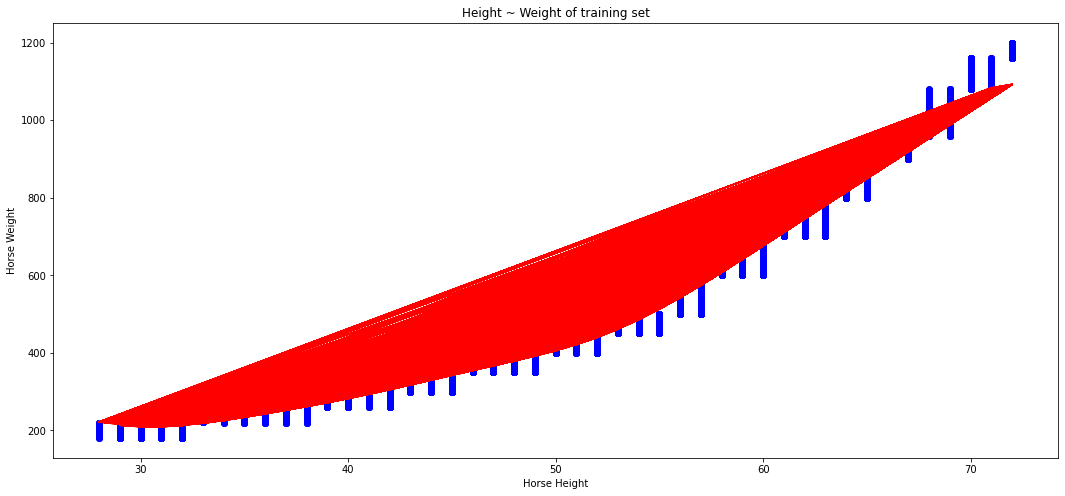

In [12]:
# now we are going to plot our data
plt.subplots(figsize=(18, 8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, svr.predict(X_train), color='red')
plt.title('Height ~ Weight of training set')
plt.xlabel('Horse Height')
plt.ylabel('Horse Weight')